**Names of all group members:**

Alex Achotian, Auguste Darracq Paries, Bogdan Dubinin, Marcus Imris, Lucas Poinsignon
---



In [2]:
import numpy as np
from scipy.stats import bernoulli

m = 20000
n = 10000
x_1 = np.random.uniform(18,80,m+n)
x_2 = np.random.uniform(1,15,m+n)
x_3 = bernoulli.rvs(0.1, size = m+n)
x = np.column_stack([x_1,x_2,x_3])


mean = np.mean(x, axis = 0)
std = np.std(x, axis = 0)


The loan amount requested, the credit score, the education level and the number of dependant children could be relevant

In [3]:
# Exercise 2.
# Building the datasets:

ksi = np.random.uniform(0,1,m+n)


sigmoid = lambda x: 1. / (1. + np.exp(-x))
p1 = lambda x: sigmoid(13.3 - 0.33*x[0] + 3.5*x[1] - 3*x[2])
p2 = lambda x: sigmoid(5 - 10*(1 if (x[0]< 25 or x[0] > 75) else 0) + 1.1*x[1] - x[2])

y1 = [1 if (ksi[i] <= p1(x[i])) else 0 for i in range(len(ksi))]
y2 = [1 if (ksi[i] <= p2(x[i])) else 0 for i in range(len(ksi))]


dataset_1 = np.column_stack([x, y1])
dataset_2 = np.column_stack([x, y2])


In [4]:
# Exercise 2. a)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

x_train = dataset_1[:m, :-1] 
x_test = dataset_1[m:, :-1]   

y_train_1 = dataset_1[:m, -1]   
y_test_1 = dataset_1[m:, -1]    
y_train_2 = dataset_2[:m, -1]   
y_test_2 = dataset_2[m:, -1]    


# "model = LogisticRegression().fit(X_data, Y_data)" fits a model
model_1 = LogisticRegression().fit(x_train, y_train_1)
model_2 = LogisticRegression().fit(x_train, y_train_2)


# "pred_X = model.predict_proba(X)" evaluates the model
# (note that it outputs both P(Y=0|X) and P(Y=1|X))
y1_train_pred = model_1.predict_proba(x_train)[:, 1]  
y1_test_pred = model_1.predict_proba(x_test)[:, 1]    

y2_train_pred = model_2.predict_proba(x_train)[:, 1]  
y2_test_pred = model_2.predict_proba(x_test)[:, 1]    


# Calculate cross-entropy loss on both datasets for train and test
cross_entropy_train_1 = log_loss(y_train_1, y1_train_pred)
cross_entropy_test_1 = log_loss(y_test_1, y1_test_pred)

cross_entropy_train_2 = log_loss(y_train_2, y2_train_pred)
cross_entropy_test_2 = log_loss(y_test_2, y2_test_pred)

print(f'Cross-entropy less for train set 1: {cross_entropy_train_1}, for test set 1: {cross_entropy_test_1}')
print(f'Cross-entropy less for train set 2: {cross_entropy_train_2}, for test set 2: {cross_entropy_test_2}')



Cross-entropy less for train set 1: 0.032008909396793406, for test set 1: 0.030089686212800008
Cross-entropy less for train set 2: 0.15156442481835072, for test set 2: 0.1517691671601431


In [5]:
# Exercise 2. b)
# Calculate normalized data


x_train_tilde=x_train/np.std(x_train)

x_test_tilde=x_test/np.std(x_test)



In [6]:
# Exercise 2.b) (i) and (ii)
from sklearn.svm import SVC
# "model = SVC(kernel='rbf', gamma=GAMMA, C=C, probability=True)" creates
# a model with kernel exp(-GAMMA \|x-x'\|_2^2) and regul. parameter C (note the relation between C and the parameter lambda from the lecture).
# "probability=True" enables the option "model.predict_proba(X)" to predict probabilities from the regression function \hat{f}^{svm}.
# "model.fit(X, Y)" optimizes the model parameters (using hinge loss)
svm_model_1 = SVC(kernel='rbf', gamma=1/10, C=0.2, probability=True).fit(x_train_tilde, y_train_1)  # gamma corresponds to the kernel's exp(-1/10||x - x'||^2)
svm_model_2 = SVC(kernel='rbf', gamma=1/10, C=0.2, probability=True).fit(x_train_tilde, y_train_2)





In [7]:
# Exercise 2.b (iii)
# "model.predict_proba(X)" predicts probabilities from features (note that it outputs both P(Y=0|X) and P(Y=1|X))
y1_train_svm_proba = svm_model_1.predict_proba(x_train_tilde)[:, 1]
y1_test_svm_proba = svm_model_1.predict_proba(x_test_tilde)[:, 1]

y2_train_svm_proba = svm_model_2.predict_proba(x_train_tilde)[:, 1]
y2_test_svm_proba = svm_model_2.predict_proba(x_test_tilde)[:, 1]


# Calculate cross-entropy loss on both datasets for train and test
cross_entropy_svm_train_1 = log_loss(y_train_1, y1_train_svm_proba)
cross_entropy_svm_test_1 = log_loss(y_test_1, y1_test_svm_proba)

cross_entropy_svm_train_2 = log_loss(y_train_2, y2_train_svm_proba)
cross_entropy_svm_test_2 = log_loss(y_test_2, y2_test_svm_proba)


print(f'Cross-entropy less for train set 1: {cross_entropy_svm_train_1}, for test set 1: {cross_entropy_svm_test_1}')
print(f'Cross-entropy less for train set 2: {cross_entropy_svm_train_2}, for test set 2: {cross_entropy_svm_test_2}')


Cross-entropy less for train set 1: 0.05334885071769429, for test set 1: 0.05399915884760635
Cross-entropy less for train set 2: 0.06449473174876831, for test set 2: 0.0670543852510607


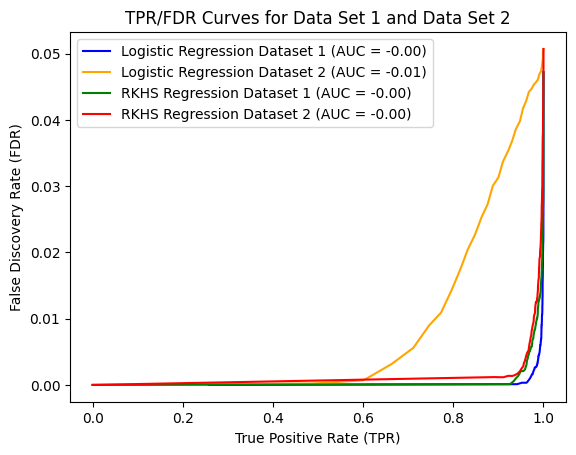

In [8]:
# Exercise 2.c
import matplotlib.pyplot as plt
# To calculate the curves, it is fine to take 100 threshold values c, i.e.,
ths = np.linspace(0, 1, 100)

# To approximately calculate the AUC, it is fine to simply use Riemann sums.
# This means, if you have 100 (a_i, b_i) pairs for the curves, a_1 <= a_2 <= ...
# then you may simply use the sum
# sum_{i=1}^99 (b_i + b_{i+1})/2 * (a_{i+1}-a_i)
# as the approximation of the integral (or AUC)

def calculate_fdr_tpr_auc(y_true, y_pred_proba, thresholds):
    FDR = []
    TPR = []
    
    for c in thresholds:
        y_pred = (y_pred_proba >= c).astype(int)
        
        TP = np.sum((y_pred == 1) & (y_true == 1))
        FP = np.sum((y_pred == 1) & (y_true == 0))
        P = np.sum(y_true == 1)
        N = np.sum(y_true == 0)
        
        TPR.append(TP / P if P > 0 else 0)
        FDR.append(FP / (TP + FP) if (TP + FP) > 0 else 0)
    
    auc = np.trapz(FDR, TPR)
    
    return FDR, TPR, auc


# first data set & logistic regression:
# (the code should be reusable for all cases, only exchanging datasets and predicted probabilities depending on the model)
FDR_1_log, TPR_1_log, auc_1_log = calculate_fdr_tpr_auc(y_test_1, y1_test_pred, ths)


# Calculate positives (only depending on the dataset)

# Calculate true positives for all threshold values

# Calculate false positives for all threshold values

# Calculate FDR and TPR rate (points on the FDR/TPR curve) and the AUC



# second data set & logistic regression:
FDR_2_log, TPR_2_log, auc_2_log = calculate_fdr_tpr_auc(y_test_2, y2_test_pred, ths)



# first data set and rkhs regression:
FDR_1_svm, TPR_1_svm, auc_1_svm = calculate_fdr_tpr_auc(y_test_1, y1_test_svm_proba, ths)

# second data set and rkhs regression:
FDR_2_svm, TPR_2_svm, auc_2_svm = calculate_fdr_tpr_auc(y_test_2, y2_test_svm_proba, ths)

plt.plot(TPR_1_log, FDR_1_log, label=f'Logistic Regression Dataset 1 (AUC = {auc_1_log:.2f})', color='blue')
plt.plot(TPR_2_log, FDR_2_log, label=f'Logistic Regression Dataset 2 (AUC = {auc_2_log:.2f})', color='orange')
plt.plot(TPR_1_svm, FDR_1_svm, label=f'RKHS Regression Dataset 1 (AUC = {auc_1_svm:.2f})', color='green')
plt.plot(TPR_2_svm, FDR_2_svm, label=f'RKHS Regression Dataset 2 (AUC = {auc_2_svm:.2f})', color='red')

plt.xlabel('True Positive Rate (TPR)')
plt.ylabel('False Discovery Rate (FDR)')
plt.title('TPR/FDR Curves for Data Set 1 and Data Set 2')
plt.legend()
plt.show()



In [ ]:
# Exercise 3.

# Set model parameters and define matrix D
ksi = np.random.uniform(0, 1, (n, 50000))

D = np.array(ksi <= np.array([p2(x[i + 20000]) for i in range(n)])[:, np.newaxis], dtype=int)

# Scenario 1:
# Define Portfolio and possible outcomes for this portfolio using matrix D
PnL_1 = (D.T @ np.ones(10000)) * 1055 - 1000*n

# Plot histogram of profits and losses
plt.figure()
plt.hist(PnL_1, bins=50)
plt.title('Histogram of Profits and Losses for strategy 1')
plt.xlabel('PnL')
plt.ylabel('Frequency')
plt.show()


# Calculate expected profit and losses and 95%-VaR
E_PnL_1 = np.mean(PnL_1)
VaR1_95 = np.percentile(PnL_1, 5)
print(f'Expected PnL for strategy 1: {E_PnL_1}')
print(f'Estimated 95%-VaR of the profit and loss distribution: {VaR1_95}')


# Scenario 2:
# Define Portfolio and possible outcomes using the matrix D and the predicted default probabilities from the logistic regression model
Borrowers = np.array([(y2_test_pred[i] >= 0.95).astype(int) for i in range(n)])
PnL_2 = (D.T @ Borrowers)*1010 - 1000*np.sum(Borrowers)

# Plot histogram of profits and losses
plt.figure()
plt.hist(PnL_2, bins= 80)
plt.title('Histogram of Profits and Losses for strategy 2')
plt.xlabel('PnL')
plt.ylabel('Frequency')
plt.show()


# Calculate expected profit and losses and 95%-VaR
E_PnL_2 = np.mean(PnL_2)
VaR2_95 = np.percentile(PnL_2, 5)
print(f'Expected PnL for strategy 2: {E_PnL_2}')
print(f'Estimated 95%-VaR of the profit and loss distribution: {VaR2_95}')

# Scenario 3:
# Define Portfolio and possible outcomes using the matrix D and the predicted default probabilities from the rkhs model
Borrowers_3 = np.array([(y2_test_svm_proba[i] >= 0.95).astype(int) for i in range(n)])
PnL_3 = (D.T @ Borrowers_3)*1010 - 1000*np.sum(Borrowers_3)

# Plot histogram of profits and losses
plt.figure()
plt.hist(PnL_3, bins=45)
plt.title('Histogram of Profits and Losses for strategy 3')
plt.xlabel('PnL')
plt.ylabel('Frequency')
plt.show()

# Calculate expected profit and losses and 95%-VaR
E_PnL_3 = np.mean(PnL_3)
VaR3_95 = np.percentile(PnL_3, 5)
print(f'Expected PnL for strategy 3: {E_PnL_3}')
print(f'Estimated 95%-VaR of the profit and loss distribution: {VaR3_95}')
